#### Import the relevant libraries

In [1]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageDraw
import numpy as np
import copy
import time
import math

#### Read and convert to greyscale

Open the image and convert it to greyscale since we are asked to convolve on greyscale images

In [37]:
def display_np(x):
    """
    Display a numpy array as an image
    """
    result = Image.fromarray(x.astype('uint8'))
    result.show()

In [38]:
def read_image(x):
    x = Image.open('test-images/' + x).convert("L")
    x = np.array(x)
    return x

In [39]:
def read_list(imgs):
    return [read_image(im) for im in imgs]

In [40]:
pixels = read_image('music1.png')
# pixels.shape

#### Custom kernels

In [41]:
def check_range(x): return (np.min(x), np.max(x))

In [42]:
check_range(pixels)

(0, 255)

**Some test kernels**

- a = identity
- b = box blur
- c = horizontal derivative
- d = gaussian
- e = sharpening
- f = derivative of gaussian

In [43]:
a = np.zeros((3,3))
a[1,1] = 1
a

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [44]:
b = np.ones((3,3))
b

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [45]:
c = np.zeros((3,3))
c[1,0], c[1,2] = -1, 1
c

array([[ 0.,  0.,  0.],
       [-1.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [46]:
d = np.array([[0.003,0.013,0.022,0.013,0.003],
             [0.013,0.059,0.097,0.059,0.013],
             [0.022,0.097,0.159,0.097,0.022],
             [0.013,0.059,0.097,0.059,0.013],
             [0.003,0.013,0.022,0.013,0.003]])
d

array([[0.003, 0.013, 0.022, 0.013, 0.003],
       [0.013, 0.059, 0.097, 0.059, 0.013],
       [0.022, 0.097, 0.159, 0.097, 0.022],
       [0.013, 0.059, 0.097, 0.059, 0.013],
       [0.003, 0.013, 0.022, 0.013, 0.003]])

In [47]:
# vary the value of alpha
e = np.zeros((5,5))
e[1:4,1:4] = a
alpha = 0.8 + 1
e = e * alpha - d
e

array([[-0.003, -0.013, -0.022, -0.013, -0.003],
       [-0.013, -0.059, -0.097, -0.059, -0.013],
       [-0.022, -0.097,  1.641, -0.097, -0.022],
       [-0.013, -0.059, -0.097, -0.059, -0.013],
       [-0.003, -0.013, -0.022, -0.013, -0.003]])

In [48]:
f = np.zeros((5,5))
f[1:4,1:4] = c
f = f * d
f

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   , -0.097,  0.   ,  0.097,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

#### Padding the image

In [49]:
def pad_image(x, kernel):
    """
    Create a new numpy array with all values 255 and then add the image in between
    i/p: image, kernel
    o/p: padded_kernelx
    """
    to_add = kernel.shape[0] - 1
    padded_image = np.full((x.shape[0] + to_add, x.shape[1] + to_add), 255)
    t = to_add // 2
    padded_image[t: padded_image.shape[0] - t, t: padded_image.shape[1] - t] = x
    return padded_image

In [50]:
p = pad_image(pixels, a)
p.shape

(233, 1276)

In [16]:
assert p.shape == (pixels.shape[0] + a.shape[0] - 1, pixels.shape[1] + a.shape[0] - 1)

In [17]:
# display_np(pixels)

#### convolution

In [52]:
def conv2d(image, kernel, div = 1, clip = True):
    """
    Applies 2d convolution on a 2d image. Also works with rectangular kernels
    """

    # number of rows and columns of the kernel
    r = kernel.shape[0]
    c = kernel.shape[1]

    # initialize a canvas for the output with 255s. We will fill values in this
    output = np.full(image.shape, 255)
    for i in range(image.shape[0] - r - 1):
        for j in range(image.shape[1] - c - 1):
            output[i][j] = np.sum(kernel * image[i:i+r, j:j+c]) / div
    if clip: np.clip(output, 0, 255, out = output)
    return output
    #display_np(output)

In [19]:
# conv2d(p, a)
# conv2d(p, b, 9)
# conv2d(p, c)
# conv2d(p, d)
# conv2d(p, e)
# conv2d(p, f)

In [20]:
sobel = np.array([[-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]])

In [21]:
conv2d(p, sobel)

#### Template matching

In [33]:
%ls .\\test-images\\

 Volume in drive C is Blade SSD
 Volume Serial Number is 58D5-4B39

 Directory of C:\Users\biraj\Documents\Computer Vision\Assignments\Assignment1\test-images

13-02-2020  12:03    <DIR>          .
13-02-2020  12:03    <DIR>          ..
12-02-2020  20:18            44,715 music1.png
12-02-2020  20:18           161,897 music2.png
12-02-2020  20:18           598,736 music3.png
12-02-2020  20:18            26,874 music4.png
12-02-2020  20:18           116,964 rach.png
12-02-2020  20:18             7,021 template1.png
12-02-2020  20:18             7,459 template2.png
12-02-2020  20:18             7,335 template3.png
               8 File(s)        971,001 bytes
               2 Dir(s)  165,149,970,432 bytes free


In [23]:
templates = read_list(['template1.png', 'template2.png', 'template3.png'])

In [24]:
canvas = np.full(p.shape, 255)

In [25]:
def find_threshold(y):
    """
    Takes a number y and returns a threshold eg 3542, thresh = 3000
    eg2 16258325 thresh 10000000
    """
    # change threshold based on the value of y
    y = [int(i) for i in str(y)]
    thresh = y[0] * 10 ** (len(y) - 1)
    return thresh

In [26]:
def get_indexes(x, vals):
    idxs1, idxs2 = np.array([]), np.array([])
    
    # filter out close values
    
    for v in vals:
        v_idxs = np.where(x == v)
        idxs1 = np.append(idxs1 ,v_idxs[0])
        idxs2 = np.append(idxs2 ,v_idxs[1])
    return idxs1, idxs2

In [27]:
def temp_match(templates, padded_im):
    """
    Takes a list of templates and an image and returns the matched template
    """
    pix = Image.fromarray(padded_im.astype('uint8'))
    img = ImageDraw.Draw(pix)  
    
    for template in templates:
        # apply the hamming distance forumula
        op = conv2d(padded_im, template, 1, False) + conv2d(255 - padded_im, 255 - template, 1, False)

        # get the min and maximum value
        x,y = check_range(op)    

        # find threshold, eg if max val is 583 thresh = 500
        thresh = find_threshold(y)

        # get all the values above thresh
        temp_op = op[op > thresh]

        # get indexes of the values above thresh
        idxs1, idxs2 = get_indexes(op, temp_op)

        tr, tc = int(template.shape[0]), int(template.shape[1])
        cr, cc = int(canvas.shape[0]), int(canvas.shape[1])

        # if the template is not going out of the canvas, plot it
        for r,c in zip(idxs1, idxs2):
            r, c = int(r), int(c)
            if r+tr < cr and c+tc < cc:
                canvas[r:r+tr, c:c+tc] = padded_im[r:r+tr, c:c+tc]
                img.rectangle([(c,r),(c+tc,r+tr)],fill=None,outline="green")
    pix.show()

In [28]:
temp_match(templates,p)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [ ]:
# display_np(canvas)

#### Part 6

In [54]:
#Using sobel kernels
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

#Convolving the image
conv_img = conv2d(p, sobel_kernel.T)

conv_img.shape

#display_np(conv_img)
# print(pixels.shape)

(233, 1276)

In [ ]:
edge_maps = copy.deepcopy(conv_img)
edge_maps[edge_maps != 0] = 1

e2 = copy.deepcopy(edge_maps)

In [ ]:
#Creating a function to calculate distance
def calc_dist(a, b, c, d):
    
    #Calculating distance
    dist = np.sqrt(np.abs(((a - c)**2) + ((b - d)**2)))
    return dist

#Retrieving the number of rows and columns in the image
row, col = conv_img.shape

#Creating an array to store distances
D = []

#Iterating through the image pixels
for p in range(0,row):
    for q in range(0,col):
        
        #Creating a temporary array
        temp = []
        
        #Iterating through the edge pixels
        for i in range(0,row):
            for j in range(i,col):
                if(conv_img[i][j] == 255):
                    
                    #Calculating distance and storing it in temp
                    dist = calc_dist(p, q, i, j)
                    temp.append(dist)
                    
        #Converting the temporary array to a numpy array
        temp = np.array(temp)
        
        #Finding the smallest distance and storing it in D
        min_dist = np.min(temp)
        D.append(min_dist)
        
        print(p,q)
        
#Reshaping D to that of the image
D = np.array(D).reshape(conv_img.shape)

#### Hough transform

In [67]:
conv_img.shape

(233, 1276)

In [74]:
def hough_transform(img):
    
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))   # max_dist
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of rho vs theta
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
    accumulator.shape

    y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges
    # len(y_idxs), len(x_idxs)

    # # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        #print(x,y)

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + np.float(diag_len)
            accumulator[int(rho), t_idx] += 1
            
    return accumulator, thetas, rhos


In [75]:
acc, thetas, rhos = hough_transform(conv_img)

In [88]:
def show_hough_line(img, accumulator, thetas, rhos, save_path=None):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    # plt.axis('off')
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

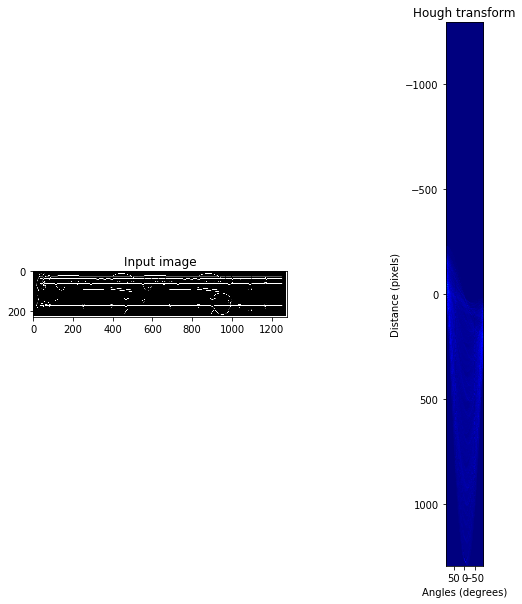

In [89]:
show_hough_line(conv_img, accumulator, thetas, rhos, save_path='test-images/output.png')

#### 1d convolution

In [ ]:
def conv1d(image, kernel, div = 1):
    """
    Performs 1d convolution on an image
    """
    
    im = copy.deepcopy(image.flatten())
    k = copy.deepcopy(kernel.flatten())

    size = len(k)
    to_remove = len(k) - 1
    
    output = np.full((im.shape), 255)
    for i in range(len(im) - to_remove):
        output[i] = np.sum(k * im[i:i+size]) / div
    return output

In [ ]:
h1 = np.array([1,2,1])
h2 = np.array([-1,0,1])

In [ ]:
tmp = conv1d(p, h1)

In [ ]:
result = conv1d(tmp, h2)

In [ ]:
check_range(result)

In [ ]:
np.clip(result, 0, 255, out = result)
check_range(result)

In [ ]:
result = result.reshape(p.shape)
result.shape